# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [336]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


##  Dealing with null values and outliers


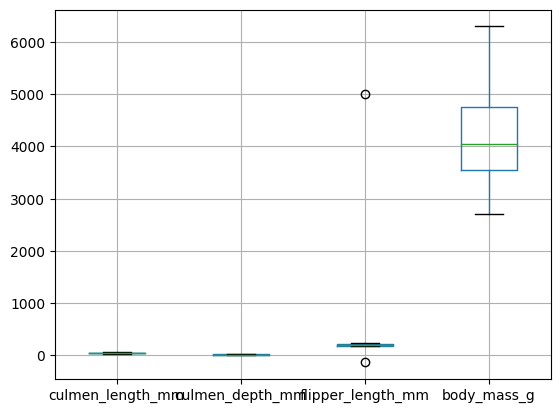

In [337]:
penguins_df.boxplot()
plt.show()

In [338]:
penguins_df.isna().sum()


culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [339]:
penguins_df.dropna(inplace=True)

In [340]:
penguins_df.isna().sum()


culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [341]:
penguins_df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

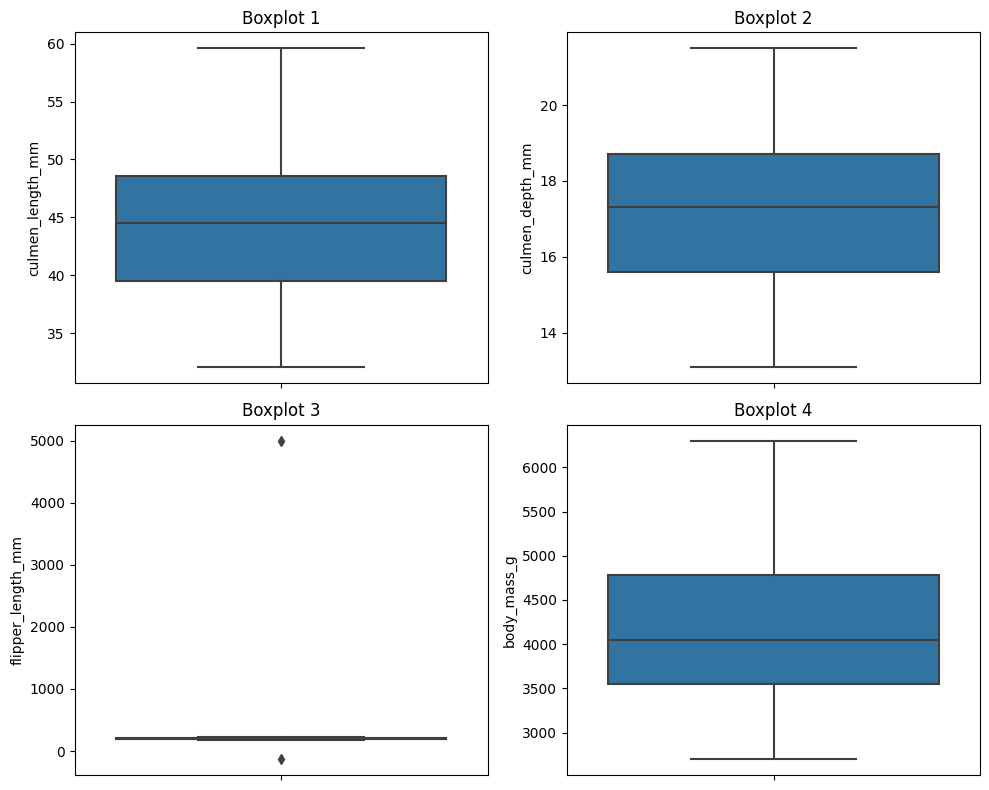

In [342]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
# Plot the boxplots using seaborn
sns.boxplot(y=penguins_df['culmen_length_mm'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot 1')

sns.boxplot(y=penguins_df['culmen_depth_mm'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot 2')

sns.boxplot(y=penguins_df['flipper_length_mm'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot 3')

sns.boxplot(y=penguins_df['body_mass_g'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot 4')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [343]:
percentile25=penguins_df['flipper_length_mm'].quantile(0.25)
percentile75=penguins_df['flipper_length_mm'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile75-1.5*iqr


In [344]:
penguins_clean= penguins_df[(penguins_df['flipper_length_mm']<upper_limit )&(penguins_df['flipper_length_mm']>lower_limit)]

In [345]:
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


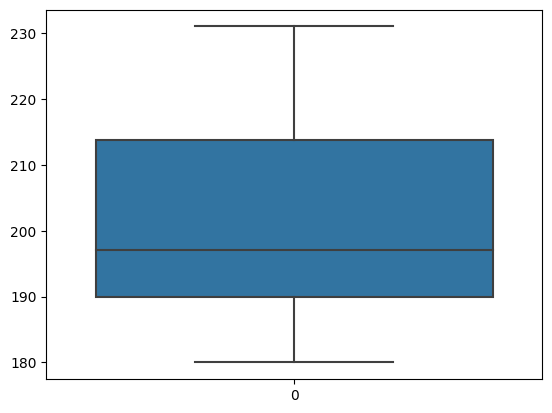

In [346]:
sns.boxplot(penguins_clean['flipper_length_mm'])
plt.show()

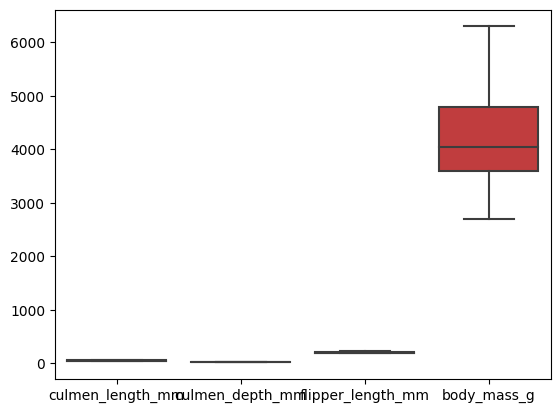

In [347]:
sns.boxplot(penguins_clean)
plt.show()

## Perform preprocessing steps on the dataset to create dummy variables

In [348]:
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   326 non-null    float64
 1   culmen_depth_mm    326 non-null    float64
 2   flipper_length_mm  326 non-null    float64
 3   body_mass_g        326 non-null    float64
 4   sex                326 non-null    object 
dtypes: float64(4), object(1)
memory usage: 23.4+ KB


In [349]:
print(penguins_clean['sex'].value_counts())
penguins_clean=penguins_clean[penguins_clean['sex']!='.']


MALE      166
FEMALE    159
.           1
Name: sex, dtype: int64


In [350]:
print(penguins_clean['sex'].value_counts())

MALE      166
FEMALE    159
Name: sex, dtype: int64


In [351]:
penguins_clean=pd.get_dummies(penguins_clean)

In [352]:
penguins_clean.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

## Perform preprocessing steps on the dataset - **scaling**

In [353]:
from sklearn.preprocessing import StandardScaler
scaling =StandardScaler()
penguins_preprocessed=scaling.fit_transform(penguins_clean)

## Perform PCA

Text(0.5, 0, 'Principal Component #')

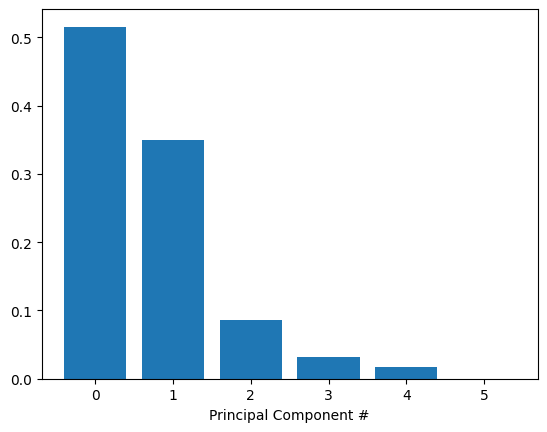

In [354]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
pca=PCA()
pca=pca.fit(penguins_preprocessed)
exp_variance=pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_variance)
ax.set_xlabel('Principal Component #')

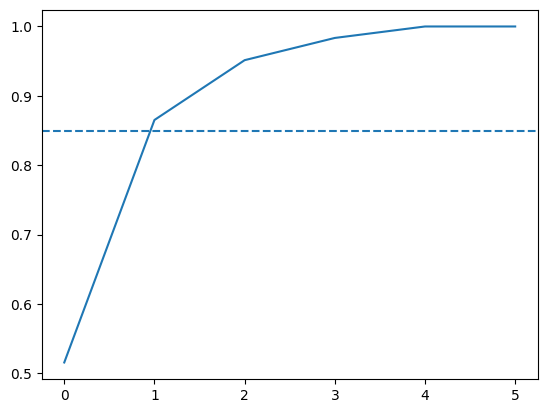

In [355]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [356]:
pca=PCA(n_components=2,random_state=42)
penguins_PCA=pca.fit_transform(penguins_preprocessed)

## Detect the optimal number of clusters for k-means clustering

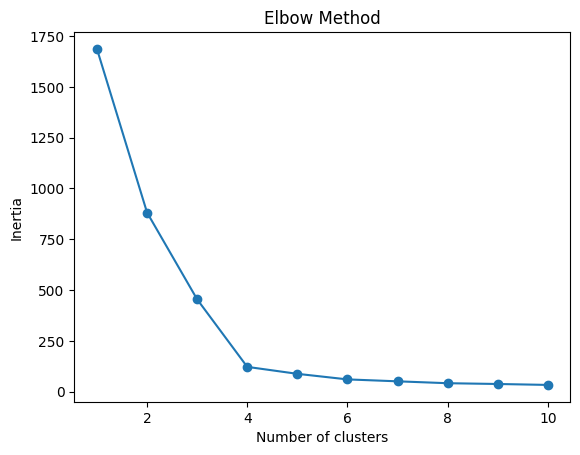

In [357]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(penguins_PCA)
  wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Run the k-means clustering algorithm

In [358]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit(penguins_PCA)


In [359]:
y_kmeans.labels_

array([3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3,
       0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0,
       3, 0, 0, 3, 0, 3, 3, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,

## visualize   clusters.

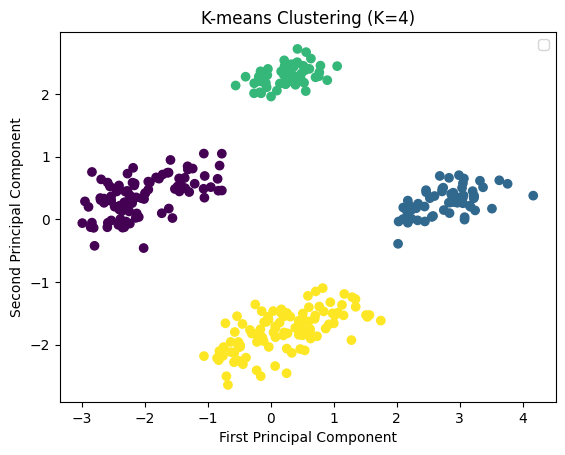

In [360]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [361]:
penguins_clean['label']=y_kmeans.labels_
stat_penguins = penguins_clean.groupby('label').mean()
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,40.284158,17.618812,189.821782
1,49.473770,15.718033,221.540984
2,45.563793,14.237931,212.706897
3,43.941905,19.120952,194.923810


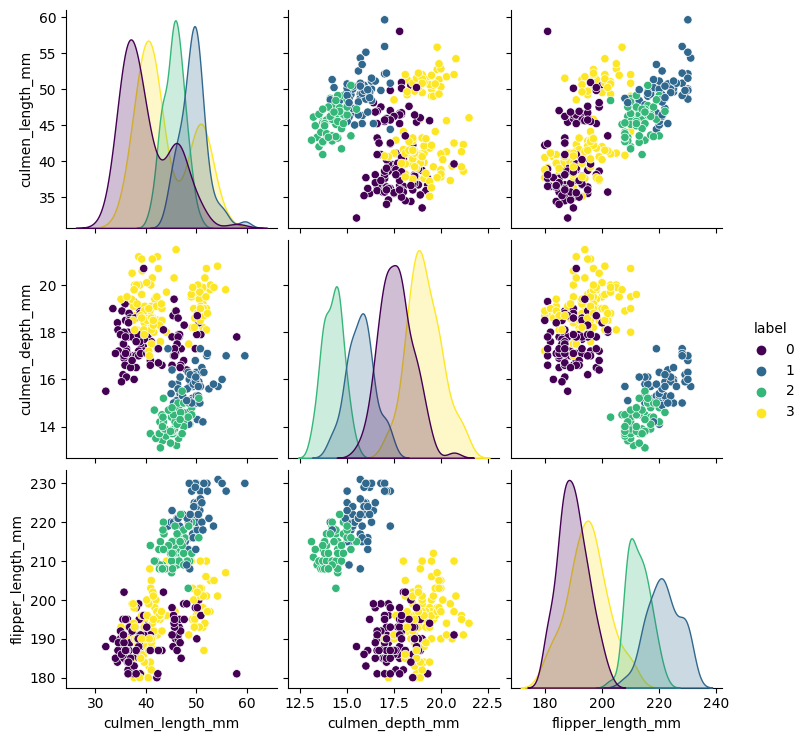

In [362]:
sns.pairplot(penguins_clean[numeric_columns], hue='label', palette='viridis')
plt.show()